In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import shap
import joblib


In [3]:
# Load the dataset
data = pd.read_csv('tracks_data.csv')


In [5]:
# Display the first few rows of the dataset
print(data.head())


  Genre                                         Track Name  \
0   pop                                          Pop Muzik   
1   pop  Popular (with Playboi Carti & Madonna) - From ...   
2   pop                           Pop Out (feat. Lil Tjay)   
3   pop  Popular - From "Wicked" Original Broadway Cast...   
4   pop                                    Popular Monster   

                                              Artist  \
0                                     M, Robin Scott   
1                 The Weeknd, Playboi Carti, Madonna   
2                                   Polo G, Lil Tjay   
3  Stephen Schwartz, Kristin Chenoweth, Stephen O...   
4                                 Falling In Reverse   

                                               Album  Popularity  \
0                                          Pop Muzik          61   
1       Popular (Music from the HBO Original Series)          83   
2                                       Die A Legend          73   
3  Wicked (Origina

In [7]:

# Data Cleaning and Preprocessing
# Check for missing values
print(data.isnull().sum())


Genre            0
Track Name       0
Artist           0
Album            0
Popularity       0
Duration (ms)    0
Explicit         0
dtype: int64


In [9]:
# Encode 'Explicit' column
data['Explicit'] = data['Explicit'].map({'TRUE': 1, 'FALSE': 0})


In [11]:
# Convert genres into float values
label_encoder = LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])


In [13]:
# Prepare features and target variable
X = data.drop(['Genre', 'Track Name', 'Artist', 'Album', 'Popularity'], axis=1)
y = data['Genre']


In [15]:
# Split the dataset into training and testing sets
# Use stratified sampling to ensure that all classes are represented
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [17]:
# Print unique classes in train and test
print("Unique classes in training set:", np.unique(y_train))
print("Unique classes in test set:", np.unique(y_test))


Unique classes in training set: [0 1 2 3 4 5]
Unique classes in test set: [0 1 2 3 4 5]


In [19]:
# Train the model using Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
# Make predictions
y_pred = model.predict(X_test)


In [23]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[0 1 0 0 1 0]
 [0 1 0 0 1 0]
 [0 0 2 0 0 0]
 [0 1 0 0 1 0]
 [0 0 0 1 1 0]
 [0 0 2 0 0 0]]


In [25]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.50      0.40         2
           2       0.50      1.00      0.67         2
           3       0.00      0.00      0.00         2
           4       0.25      0.50      0.33         2
           5       0.00      0.00      0.00         2

    accuracy                           0.33        12
   macro avg       0.18      0.33      0.23        12
weighted avg       0.18      0.33      0.23        12



C:\Users\imand\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\imand\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\imand\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
# Calculate AUC-ROC score
# Get predicted probabilities
predicted_proba = model.predict_proba(X_test)


In [29]:
# Print the shape and classes of the predicted probabilities
print(f"Shape of predicted probabilities: {predicted_proba.shape}")  # Should be (n_samples, n_classes)
print(f"Unique classes in y_test: {np.unique(y_test)}")


Shape of predicted probabilities: (12, 6)
Unique classes in y_test: [0 1 2 3 4 5]


In [31]:
# Check if the number of classes in y_test matches predicted probabilities
if len(np.unique(y_test)) == predicted_proba.shape[1]:
    # Calculate AUC-ROC score if the condition is met
    roc_auc = roc_auc_score(y_test, predicted_proba, multi_class='ovr')
    print(f"AUC-ROC Score: {roc_auc:.4f}")
else:
    print("Mismatch between the number of classes in y_test and predicted probabilities.")


AUC-ROC Score: 0.5875


In [45]:
# Evaluate the model using MAE, MSE, and R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)


In [47]:
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r_squared:.4f}")


Mean Absolute Error (MAE): 1.5000
Mean Squared Error (MSE): 4.1667
R-squared: -0.4286


In [33]:
# Cross-validation performance
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores):.4f}")


Cross-Validation Scores: [0.33333333 0.16666667 0.08333333 0.33333333 0.16666667]
Mean CV Score: 0.2167


In [35]:
# Feature Importance Analysis
importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)



In [49]:
# SHAP Values for Interpretability
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


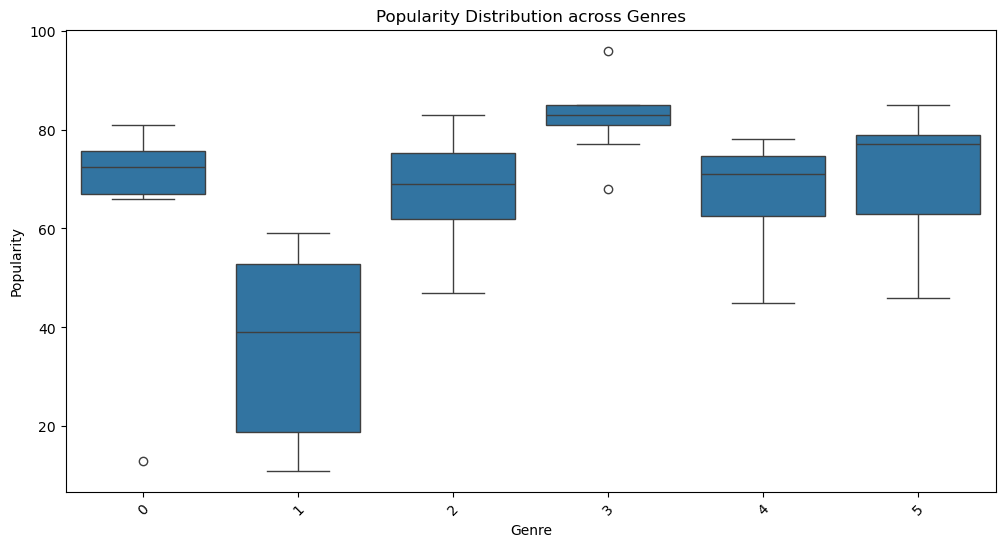

In [39]:
# Create a box plot for Popularity across Genres
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Genre', y='Popularity')
plt.title('Popularity Distribution across Genres')
plt.xticks(rotation=45)
plt.show()


In [41]:
# Save the model and important data for further use if necessary
joblib.dump(model, 'genre_classification_model.pkl')  

['genre_classification_model.pkl']